In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing import image
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
x_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

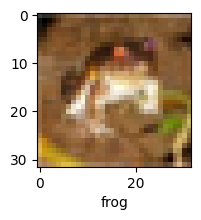

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    class_index = np.argmax(y[index])  # One-hot encoded etiketten sınıfı buluyoruz
    plt.xlabel(class_names[class_index])
plot_sample(x_train,y_train,0)

In [7]:


# Model structure
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),  # Girdiyi düzleştir
    layers.Dense(3000, activation='relu'),  # 3000 nöronlu dense katmanı
    layers.Dense(1000, activation='relu'),  # 1000 nöronlu dense katmanı
    layers.Dense(10, activation='softmax')  # 10 sınıf için softmax kullan
])

# Modeli compile
ann.compile(optimizer='SGD',
            loss='categorical_crossentropy',  # integer label'ler için uygun kayıp fonksiyonu
            metrics=['accuracy'])

# training
ann.fit(x_train, y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.3066 - loss: 1.9285
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4186 - loss: 1.6440
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4513 - loss: 1.5475
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.4746 - loss: 1.4897
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.4933 - loss: 1.4334


In [8]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1000
           1       0.74      0.32      0.44      1000
           2       0.54      0.09      0.15      1000
           3       0.33      0.36      0.34      1000
           4       0.52      0.23      0.32      1000
           5       0.52      0.21      0.30      1000
           6       0.50      0.58      0.54      1000
           7       0.32      0.78      0.46      1000
           8       0.57      0.67      0.62      1000
           9       0.42      0.74      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.43     10000
weighted avg       0.50      0.45      0.43     10000



In [9]:
cnn = models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(input_shape=(32,32,3)),  # Girdiyi düzleştir
    layers.Dense(3000, activation='relu'),  # 3000 nöronlu dense katmanı
    layers.Dense(1000, activation='relu'),  # 1000 nöronlu dense katmanı
    layers.Dense(10, activation='softmax')  # 10 sınıf için softmax kullan
])

# Modeli derle
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',  # integer label'ler için uygun kayıp fonksiyonu
            metrics=['accuracy'])

# Modeli eğit
cnn.fit(x_train, y_train, epochs=5)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 407s 258ms/step - accuracy: 0.4031 - loss: 1.6761
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 374s 239ms/step - accuracy: 0.6367 - loss: 1.0199
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 351s 224ms/step - accuracy: 0.7347 - loss: 0.7531
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 352s 225ms/step - accuracy: 0.8198 - loss: 0.5089
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 366s 234ms/step - accuracy: 0.8945 - loss: 0.3062


In [13]:
predicted=cnn.predict(x_test)
predicted
from sklearn.metrics import confusion_matrix,classification_report
y_pred1=cnn.predict(x_test)
y_pred_classes1=[np.argmax(element) for element in y_pred1]
y_test_classes1 = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes1, y_pred_classes1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1000
           1       0.78      0.77      0.77      1000
           2       0.54      0.56      0.55      1000
           3       0.46      0.49      0.47      1000
           4       0.67      0.45      0.54      1000
           5       0.52      0.63      0.57      1000
           6       0.64      0.79      0.71      1000
           7       0.75      0.68      0.71      1000
           8       0.83      0.70      0.76      1000
           9       0.71      0.80      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



Accuracy: 0.6567


In [16]:

# Load the new image
img_height=32
img_width=32
new_image = image.load_img('lama.jpeg', target_size=(img_height, img_width))
# Convert the image to a numpy array and add an extra dimension
new_image_array = image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
# Normalize if needed (depending on your training preprocessing)
new_image_array /= 255.0  # If you normalized the data during training
# Predict class probabilities for the new image
predicted_probabilities = cnn.predict(new_image_array)

# If it's multi-class classification, get the predicted class index
predicted_class = np.argmax(predicted_probabilities, axis=1)

# Output the predicted class
print(f'Predicted class: {predicted_class}')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = class_names[predicted_class[0]]
print(f'The model predicts the image belongs to class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted class: [5]
The model predicts the image belongs to class: dog
